# Race in the United States
In this data exploration, our goal is to understand and find the demogrpahic representation in various states. We took data from the Census via Census Reporter to conduct this research. Paired with our findings from another data analysis, we decided to compare the demographics of Wisconsin and New Mexico, the states with the Lowest and Highest SNAP enrollment. We wanted to see if there was any correlation between race, food insecurity, and SNAP usage. Therefore, we are using this data exploration to compare with the map we have created regarding state enrollment in SNAP. 

In [189]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import plotly.express as px

This serves to import any and all of the libraries that were assumed to be of use before starting the data exploration.

In [190]:
race = gpd.read_file('raceinus.geojson')

Once again, we collected this data from Census Reporter and it depicts the population of people categorized by race within each state. 

In [191]:
race.head()

,geoid,name,B02001001,"B02001001, Error",B02001002,"B02001002, Error",B02001003,"B02001003, Error",B02001004,"B02001004, Error",...,"B02001006, Error",B02001007,"B02001007, Error",B02001008,"B02001008, Error",B02001009,"B02001009, Error",B02001010,"B02001010, Error",geometry
0,04000US01,Alabama,4903185.0,0.0,3326375.0,8070.0,1319551.0,8216.0,23265.0,3739.0,...,716.0,74451.0,7104.0,91522.0,6916.0,6258.0,1880.0,85264.0,6976.0,"MULTIPOLYGON (((-88.13999 34.58170, -88.13997 ..."
1,04000US02,Alaska,731545.0,0.0,469771.0,4147.0,22551.0,1965.0,115544.0,3935.0,...,834.0,12602.0,3697.0,57476.0,5446.0,2591.0,923.0,54885.0,5220.0,"MULTIPOLYGON (((-165.25416 60.91711, -165.2630..."
2,04000US04,Arizona,7278717.0,0.0,5701810.0,20005.0,343729.0,7680.0,332273.0,8619.0,...,1611.0,364442.0,20245.0,280574.0,12629.0,52367.0,7130.0,228207.0,11358.0,"MULTIPOLYGON (((-114.51684 33.02789, -114.5169..."
3,04000US05,Arkansas,3017804.0,0.0,2315020.0,8944.0,467468.0,6259.0,17216.0,2316.0,...,1801.0,75590.0,8418.0,83603.0,7131.0,7216.0,2619.0,76387.0,6835.0,"MULTIPOLYGON (((-94.55217 36.10213, -94.55250 ..."
4,04000US06,California,39512223.0,0.0,23484958.0,66457.0,2282144.0,17125.0,321112.0,15788.0,...,5626.0,5424558.0,70153.0,1978145.0,33931.0,421998.0,16861.0,1556147.0,30705.0,"MULTIPOLYGON (((-124.13656 41.46445, -124.1378..."


In [192]:
race.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   geoid             51 non-null     object  
 1   name              51 non-null     object  
 2   B02001001         51 non-null     float64 
 3   B02001001, Error  51 non-null     float64 
 4   B02001002         51 non-null     float64 
 5   B02001002, Error  51 non-null     float64 
 6   B02001003         51 non-null     float64 
 7   B02001003, Error  51 non-null     float64 
 8   B02001004         51 non-null     float64 
 9   B02001004, Error  51 non-null     float64 
 10  B02001005         51 non-null     float64 
 11  B02001005, Error  51 non-null     float64 
 12  B02001006         51 non-null     float64 
 13  B02001006, Error  51 non-null     float64 
 14  B02001007         51 non-null     float64 
 15  B02001007, Error  51 non-null     float64 
 16  B02001008         51

In [193]:
list(race)

['geoid',
 'name',
 'B02001001',
 'B02001001, Error',
 'B02001002',
 'B02001002, Error',
 'B02001003',
 'B02001003, Error',
 'B02001004',
 'B02001004, Error',
 'B02001005',
 'B02001005, Error',
 'B02001006',
 'B02001006, Error',
 'B02001007',
 'B02001007, Error',
 'B02001008',
 'B02001008, Error',
 'B02001009',
 'B02001009, Error',
 'B02001010',
 'B02001010, Error',
 'geometry']

In [194]:
columns_to_keep = ['geoid',
 'name',
 'B02001001',
 'B02001002',
 'B02001003',
 'B02001004',
 'B02001005',
 'B02001006',
 'B02001007',
 'B02001008',
 'B02001009',
 'B02001010',
 'geometry']

In [195]:
race = race[columns_to_keep]

In [196]:
race.columns = ['geoid',
 'name',
 'Total',
 'White Alone',
 'Black or African American Alone',
 'American Indian and Alaska Native Alone',
 'Asian Alone',
 'Native Hawaiian and other Pacific Islander Alone',
 'Some other race alone',
 'Two or more races',
 'Two races including Some other race',
 'Two races excluding Some other race, and three or more races',
 'geometry']

Here, we removed any unneccesary columns and renamed them so they have more familiar language.

In [197]:
race.head()

,geoid,name,Total,White Alone,Black or African American Alone,American Indian and Alaska Native Alone,Asian Alone,Native Hawaiian and other Pacific Islander Alone,Some other race alone,Two or more races,Two races including Some other race,"Two races excluding Some other race, and three or more races",geometry
0,04000US01,Alabama,4903185.0,3326375.0,1319551.0,23265.0,66129.0,1892.0,74451.0,91522.0,6258.0,85264.0,"MULTIPOLYGON (((-88.13999 34.58170, -88.13997 ..."
1,04000US02,Alaska,731545.0,469771.0,22551.0,115544.0,43678.0,9923.0,12602.0,57476.0,2591.0,54885.0,"MULTIPOLYGON (((-165.25416 60.91711, -165.2630..."
2,04000US04,Arizona,7278717.0,5701810.0,343729.0,332273.0,241721.0,14168.0,364442.0,280574.0,52367.0,228207.0,"MULTIPOLYGON (((-114.51684 33.02789, -114.5169..."
3,04000US05,Arkansas,3017804.0,2315020.0,467468.0,17216.0,46078.0,12829.0,75590.0,83603.0,7216.0,76387.0,"MULTIPOLYGON (((-94.55217 36.10213, -94.55250 ..."
4,04000US06,California,39512223.0,23484958.0,2282144.0,321112.0,5865435.0,155871.0,5424558.0,1978145.0,421998.0,1556147.0,"MULTIPOLYGON (((-124.13656 41.46445, -124.1378..."


In [211]:
race['Percent White Alone'] = race['White Alone']/race['Total'] *100
race['Percent Black or African American Alone'] = race['Black or African American Alone']/race['Total'] *100
race['Percent American Indian and Alaska Native Alone'] = race['American Indian and Alaska Native Alone']/race['Total'] *100
race['Percent Asian Alone'] = race['Asian Alone']/race['Total'] *100
race['Percent Native Hawaiian and other Pacific Islander Alone'] = race['Native Hawaiian and other Pacific Islander Alone']/race['Total'] *100
race['Percent Some other race alone'] = race['Some other race alone']/race['Total'] *100
race['Percent Two or more races'] = race['Two or more races']/race['Total'] *100
race['Percent Two races including Some other race'] = race['Two races including Some other race']/race['Total'] *100
race['Percent Two races excluding Some other race, and three or more races'] = race['Two races excluding Some other race, and three or more races']/race['Total'] *100


In order to normalize the data, we created new columns which calculates the percentage of a race lives within each state. 

In [199]:
race_t = race.T
race_t.head()

,0,1,2,3,4,5,6,7,8,9,...,41,42,43,44,45,46,47,48,49,50
geoid,04000US01,04000US02,04000US04,04000US05,04000US06,04000US08,04000US09,04000US10,04000US11,04000US12,...,04000US46,04000US47,04000US48,04000US49,04000US50,04000US51,04000US53,04000US54,04000US55,04000US56
name,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,District of Columbia,Florida,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
Total,4.90318e+06,731545,7.27872e+06,3.0178e+06,3.95122e+07,5.75874e+06,3.56529e+06,973764,705749,2.14777e+07,...,884659,6.82917e+06,2.89959e+07,3.20596e+06,623989,8.53552e+06,7.61489e+06,1.79215e+06,5.82243e+06,578759
White Alone,3.32638e+06,469771,5.70181e+06,2.31502e+06,2.3485e+07,4.82238e+06,2.66023e+06,659719,300058,1.60101e+07,...,743764,5.27291e+06,2.12733e+07,2.79953e+06,585117,5.71465e+06,5.65109e+06,1.668e+06,4.96335e+06,525860
Black or African American Alone,1.31955e+06,22551,343729,467468,2.28214e+06,240538,396745,219418,320704,3.44106e+06,...,20866,1.1413e+06,3.55392e+06,36918,9435,1.65991e+06,305924,65925,374747,7116


In an attempt to reformat the data to retrieve information, this code swaps the rows and columns for the dataframe.

In [200]:
list(race_t)

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50]

In [201]:
race_t.columns= ['Alabama',
'Alaska',
'Arizona',
'Arkansas',
'California',
'Colorado',
'Connecticut',
'Delaware',
'District of Columbia',
'Florida',
'Georgia',
'Hawaii',
'Idaho',
'Illinois',
'Indiana',
'Iowa',
'Kansas',
'Kentucky',
'Louisiana',
'Maine',
'Maryland',
'Massachusetts',
'Michigan',
'Minnesota',
'Mississippi',
'Missouri',
'Montana',
'Nebraska',
'Nevada',
'New Hampshire',
'New Jersey',
'New Mexico',
'New York',
'North Carolina',
'North Dakota',
'Ohio',
'Oklahoma',
'Oregon',
'Pennsylvania',
'Rhode Island',
'South Carolina',
'South Dakota',
'Tennessee',
'Texas',
'Utah',
'Vermont',
'Virginia',
'Washington',
'West Virginia',
'Wisconsin',
'Wyoming']

The past two code cells aim to rename the the columns by State so that it would be eaiser to call infomation.

In [202]:
race_t.head()

,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,District of Columbia,Florida,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
geoid,04000US01,04000US02,04000US04,04000US05,04000US06,04000US08,04000US09,04000US10,04000US11,04000US12,...,04000US46,04000US47,04000US48,04000US49,04000US50,04000US51,04000US53,04000US54,04000US55,04000US56
name,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,District of Columbia,Florida,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
Total,4.90318e+06,731545,7.27872e+06,3.0178e+06,3.95122e+07,5.75874e+06,3.56529e+06,973764,705749,2.14777e+07,...,884659,6.82917e+06,2.89959e+07,3.20596e+06,623989,8.53552e+06,7.61489e+06,1.79215e+06,5.82243e+06,578759
White Alone,3.32638e+06,469771,5.70181e+06,2.31502e+06,2.3485e+07,4.82238e+06,2.66023e+06,659719,300058,1.60101e+07,...,743764,5.27291e+06,2.12733e+07,2.79953e+06,585117,5.71465e+06,5.65109e+06,1.668e+06,4.96335e+06,525860
Black or African American Alone,1.31955e+06,22551,343729,467468,2.28214e+06,240538,396745,219418,320704,3.44106e+06,...,20866,1.1413e+06,3.55392e+06,36918,9435,1.65991e+06,305924,65925,374747,7116


In [203]:
race_t = race_t.drop(['name'])

In [204]:
race_t = race_t.drop(['geoid'])

In [205]:
race_t.head()

,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,District of Columbia,Florida,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
Total,4.90318e+06,731545,7.27872e+06,3.0178e+06,3.95122e+07,5.75874e+06,3.56529e+06,973764,705749,2.14777e+07,...,884659,6.82917e+06,2.89959e+07,3.20596e+06,623989,8.53552e+06,7.61489e+06,1.79215e+06,5.82243e+06,578759
White Alone,3.32638e+06,469771,5.70181e+06,2.31502e+06,2.3485e+07,4.82238e+06,2.66023e+06,659719,300058,1.60101e+07,...,743764,5.27291e+06,2.12733e+07,2.79953e+06,585117,5.71465e+06,5.65109e+06,1.668e+06,4.96335e+06,525860
Black or African American Alone,1.31955e+06,22551,343729,467468,2.28214e+06,240538,396745,219418,320704,3.44106e+06,...,20866,1.1413e+06,3.55392e+06,36918,9435,1.65991e+06,305924,65925,374747,7116
American Indian and Alaska Native Alone,23265,115544,332273,17216,321112,57578,9052,4353,1886,59558,...,75809,20431,144993,35368,2928,23388,103882,3601,54577,13774
Asian Alone,66129,43678,241721,46078,5.86544e+06,188461,166393,36592,28722,599799,...,11530,125742,1.44607e+06,76470,8603,565643,684967,14311,167420,4633


In [206]:
race_t = race_t.drop(['geometry'])

In [207]:
race_t['Wyoming']

Total                                                                     578759
White Alone                                                               525860
Black or African American Alone                                             7116
American Indian and Alaska Native Alone                                    13774
Asian Alone                                                                 4633
Native Hawaiian and other Pacific Islander Alone                             754
Some other race alone                                                      10799
Two or more races                                                          15823
Two races including Some other race                                         2705
Two races excluding Some other race, and three or more races               13118
Percent White Alone                                                      90.8599
Percent Black or African American Alone                                  1.22953
Percent American Indian and 

In [208]:
race_t['New Mexico']

Total                                                                   2.09683e+06
White Alone                                                             1.54995e+06
Black or African American Alone                                               48337
American Indian and Alaska Native Alone                                      199341
Asian Alone                                                                   36549
Native Hawaiian and other Pacific Islander Alone                                924
Some other race alone                                                        189281
Two or more races                                                             72444
Two races including Some other race                                           20393
Two races excluding Some other race, and three or more races                  52051
Percent White Alone                                                         73.9189
Percent Black or African American Alone                                     

Now that we can isolate a single column/state, we can get a more specific look into the demographics provided. This really helps to clean up the data and provide us with only the information that we need to continue in our data exploration.

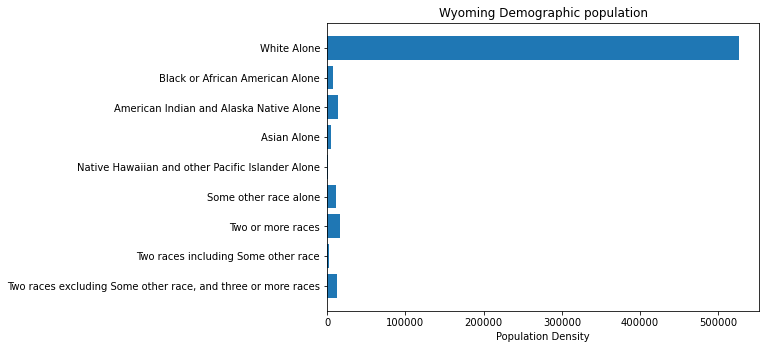

In [209]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
races = ['White Alone','Black or African American Alone','American Indian and Alaska Native Alone','Asian Alone','Native Hawaiian and other Pacific Islander Alone','Some other race alone','Two or more races','Two races including Some other race','Two races excluding Some other race, and three or more races']
population = [525860,7116,13774,4633,754,10799,15823,2705,13118]
ax.barh(races,population)
ax.invert_yaxis()
ax.set_xlabel('Population Density')
ax.set_title('Wyoming Demographic population')
plt.show()

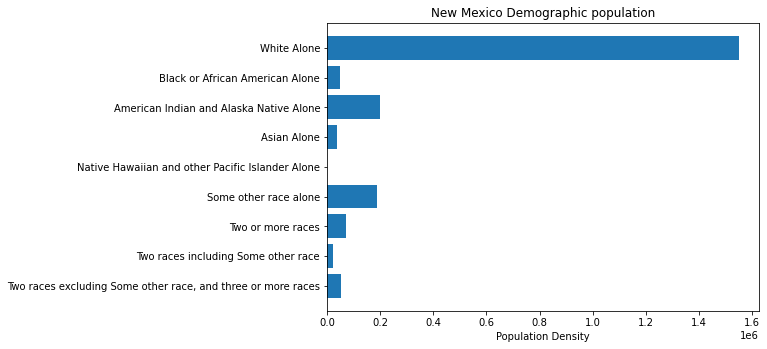

In [177]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
races = ['White Alone','Black or African American Alone','American Indian and Alaska Native Alone','Asian Alone','Native Hawaiian and other Pacific Islander Alone','Some other race alone','Two or more races','Two races including Some other race','Two races excluding Some other race, and three or more races']
population = [1549950,48337,199341,36549,924,189281,72444,20393,52051]
ax.barh(races,population)
ax.invert_yaxis()
ax.set_xlabel('Population Density')
ax.set_title('New Mexico Demographic population')
plt.show()

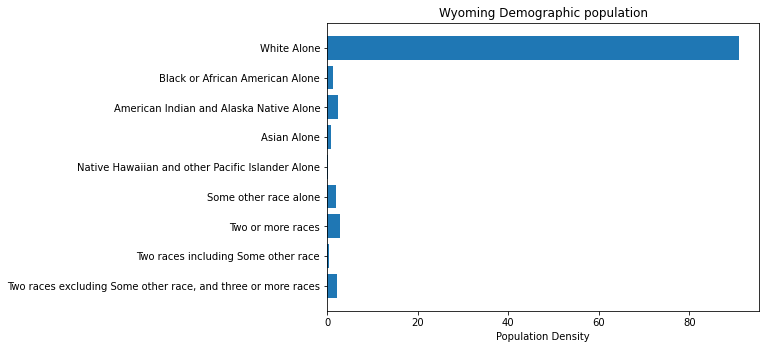

In [210]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
races = ['White Alone','Black or African American Alone','American Indian and Alaska Native Alone','Asian Alone','Native Hawaiian and other Pacific Islander Alone','Some other race alone','Two or more races','Two races including Some other race','Two races excluding Some other race, and three or more races']
population = [90.8599,1.22953,  2.37992, 0.800506,0.130279, 1.86589, 2.73395,0.467379,2.26657]
ax.barh(races,population)
ax.invert_yaxis()
ax.set_xlabel('Population Density')
ax.set_title('Wyoming Demographic population')
plt.show()

The three code cells above depict horizontal bar charts that show the demographics that live within Wyoming and New Mexico. The last bar chart depicts the percentages which has the same outwardly appearance as the general population chart, other than a change in x axis. What we can see from these charts is that while there is a high White population in both states, there seems to be more diversity in New Mexico, the state that has the highest SNAP enrollment in the United States. This can be revealing of how minorities depend on SNAP or food assistance more, which also hints that they face food insecurity more often. It is also important to consider the definition of "white" as Hispanics may have been group within that category in this cesus tract. 

Ethan worked on this data exploration.